# Stream lines

*Prof. dr.ir. T.N.Olsthoorn*

*Heemstede, 161021

## Stream lines
Streamlines are lines of constant stream-function value. This differs from flow paths, which we will tackle later on. Flow lines of flow paths are lines that are followed by particles. Because in a dynamic model the flow conditions will normally vary with time, such flow lines are not unique, i.e. particles injected at the same spot but at a different time will follow different tracks and must be traced. Dit is not the case with streamlines. Streamlines (if they exist) can be computed by contouring the ``stream function``, without any tracing. However, the stream function is only defined in 2D steady-sate flow without sources and sinks (and without leakage or recharge for that matter). It is said that the flow must be 2D and divergence free, which can be mathematically expressed as

$ \frac {\partial q_x} {\partial x} + \frac {\partial q_y} {\partial y} = 0 $

Concrete sinks and source cause so-called branch-cuts in the stream function. In practice, these can be dealt with in way that they will resamble vertical wells in the 2D image, which is often what they are.

Steamlines are especially useful in cross sections, either flat or axisymmetrical. This is because in such cross sections flow tends to be essentially 2D and divergence of flow is virtually absent. Even in transient flow situations, the divergence of fow due to elastic storage in a cross sectionis so small relative to the local specific discharge, that it can be practically ingored, meaning that also in transient flow in cross sections the stream function may be used, yielding a continuously changing streamline pattern along with the development of the flow, which, in turn lends itself of animation.

Where the conditions are fulfilled (divergence free 2D flow), showing streamlines as contours of the stream function is efficient manner to show the flow in a quantitative way. The beauty and the power of the stream function is that it provides a complete spacial picture of the actual flow. Given the function, the specific discharge at any point in the system is known as well as the total discharge between any pair of arbitrarily chosen point. As a plus, the stream function can readily be computed from the results of the finite difference model.

## The stream function

The steam function is total discharge between a streamline taken as reference and any point in the model. And a sream line is a line on which the stream function has the same value. Hence stream lines are contours of the stream function and the have a value, that of the stream function at the line.

One can draw an arbitrary line between the reference or zero streamline and such a point, and the total discharge across this line is given by the value of the stream function. There is, of course, also a stream line through this arbitrarily chosen point. And it follows that the discharge between this streamline and the reference stream line is the same everywhere in the model. This is true for any pair of stream lines. 

While the reference stream line, the one that we will give the stream function value zero, can be chosen arbitrarily, we should taken one that we know beforehand. In practical modeling that is generally so for the bottom of our model, when it is closed. And if it is not closed, but we know how much discharge enters the bottom we can select the point to the left end of the bottom as zero and compute the stream function along the bottom before hand. Hence chosing the bottom of our model to have a stream function value zero is most often a good choice.

Remember we're dealing with cross sections. That is in practice we deal with the zx plane of our model.

Mathematically we can obtain the stream function, indicated by $ \, \Psi $, by integrating the horizontal specific discharge from the bottom of our model upward to any elevation:

$$  \Psi = \intop_{z_{min}}^{z_{max}} \left( y \right) \, dy  $$

The finite differnce model yields among others the flows across the cell faces. So to obtain the total fow between the bottom of the model and the top of the lowest layer, we just have the lowest layer of `Qx`. When we accumulate `Qx` from the bottom of the model upwards we obtain the stream function values in all cell corners, and not in the cell centers, of the cross section. The stream function for a cross section of a model can, therefore, be easily computed from the infacial flows

$$ \Psi = \sum_0^n Q_{x_i} $$

Where $ Q_{x_i} $ is the interfacial flow in `x`-direction at some given `x`-coordinate, 0 the index for the bottom plane of the model and `n` the index of plane `n` of the model.

Notice that the dimension of $ \Psi $ is [L2/T] for a flat cross section or layer and [L3/T] for an axially symmetric cross section. When contouring the stream function $ \Psi $, we should always denote the difference between two adjacent contours, i.e. the stream lines, in the title together with its dimension. With this, the flow in such a picture is fully determined by the stream line contours.

The implemenation follows next.

## The stream function implemented

In [3]:
def psi(Qx, row=0):
    """Compute the stream function for a plane in 2D or a 3D Qx array
    
    The stream function can be computed for planes, ordinarily for vertical planes.
    Psi only compute the stream function for the xy plan (flat) or zx plane (vertial)
    
    Paameters:
    ----------
    `Qx` : ndarray, [L3/T], choose row width 1 m to get [L2/T] in a flat model
        a 3D array with interfacial flows in x-direction computed with a finite differnce model
    `Qx` : ndarray  [L3/T]
        a 2D plane, may be horizontal or a row of a vertical model transposed (not usual)
    `row` : int
        the row of the model for which the stream function should be comptued.
        Notice that the divergence should be zero for the stream function to make sense.
        
    returns:
    --------
    `psi` : nodarray [L3/T]
    The stream functions at the corners of the grid except the outer lines x[0] and x[-1]
    
    TO 161021
    """
    if len(Qx.shape)==3:
        Q = (Qx[row].T)[::-1]
    else:
        Q = Qx[::-1]
    psi = np.vstack( ( np.zeros((1, len(Q[0]))), np.cumsum(Q, axis=0)) )
    return psi[::-1]

## This function is merged with the file fdm_d.py into fdm.py
# So import fdm.py to use it with fdm3

The function expects a 3D array as Qx in from the finite difference model and the row number that will be considerd the cross sectional plane for which the $ \Psi $ is to be computed. It is the user's responsibility to make sure that the requiremenst for the stream function to make sense are fulfilled.

The function can also take a 2D array. But this option is seldom used, because in our finite difference framwork, the model is always 3D, even when it only has one row. We always keep the `z`-direction vertical, thus preventing a lot of confusion.

The function can be easily adapted to compute the stream function for planes along columns. But this option is also seldom used, so it is left out.

## Examples

Two examples will be worked out: a building pit which shows how detailed vertical flows are computed in a practical case to optimized pumping. It also demonstrates how one can readily switch between flat and axially symmetric cross section and it demonstrates the stream lines.

The second example shows the heads and stream lines in a confined aquifer with a partially penetrating screen that extracts water. This model is also axisymmetric. It also compares the heads from the numeric models with those from an analytical solution.

### Smart pumping below a building pit: a flat and an axially symmetric model

The first example will consider a building pit which can both be computed in a flat cross section and an axially symmetric cross section. The subsurface consists of a 5 m thick semi-confining unit atop a 20 m thick aquifer atop a 10 m thick semi-confining layer atop a 30 m thick second aquifer. The building pit, which has a width of 20 m, a radius of 10 m, and is surrounded by impervious sheet piling to a depth of 12 m. Wells with 5 m long screens are installed inside the sheet piling immediately below the top confining layer. The objective is to design the necessary extraction to make sure that the head below the building pit is lowered by 5 m.

The properties are as follows

In [5]:
import sys

myModules = '/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/'

if not myModules in sys.path:
    sys.path.append(myModules)

%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import fdm_d
import mfgrid
import mfetc
import mfexceptions as err

from importlib import reload

Total outflow = -4.6819 m2/d
Total inflow  = 4.6819 m2/d


<IPython.core.display.Javascript object>


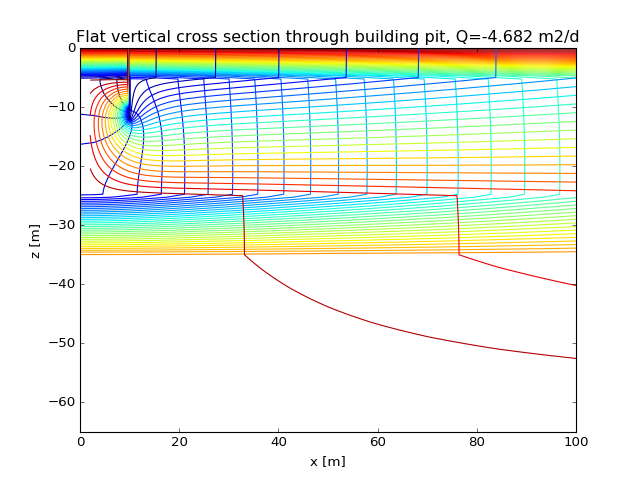

In [6]:
axial = False

# aquifer
d1 = 5.   # m, thickness of top confining layer
c1 = 250. # d, vertical hydraulic resistance of top confining unit
D1 = 20.  # m, thickness of first aquifer
k1 = 10. # m/d, hydralic conductivity of first aquifer
d2 = 10. # m, thickness of second confining layer
c2 = 500. # d, vertical hydraulic resistance of the second confining layer
D2 = 30. # m, thickness of second aquifer
k2 = 25. # m/d, hydraulic conductivity of the second aquifer

# coordinates
R = 10.0 # m, half width or radius of building pit
RR = 2500 # m, extent of model

z0 = 0 # m, ground surface elevation
z = z0 - np.cumsum(np.array([0, d1, D1, d2, D2])) # one model layer per system layer
z = np.arange(z[0],z[-1]-0.5,-0.5) # refined vertical grid
y = np.array([-0.5,0.5])
x = np.hstack([0, R - np.logspace(-1, np.log10(R), 21), R-0.1,  R + np.logspace(-1, np.log10(RR - R))])

gr = mfgrid.Grid(x, y, z, axial)

# specifying k for all layers (We do this sequentially)
k = gr.const(d1/c1)
k[:,:,0] = 0.5*d1/c1  # fixed head in center of top layer
k[gr.ZM < z0-d1      ] = k1
k[gr.ZM < z0-d1-D1   ] = d2/c2
k[gr.ZM < z0-d1-D1-d2] = k2

# sheet piling 
kp  = 1e-7 # m/d, k sheet piling
xpl =  9.9 # m, left of sheet piling
xpr = 10.1 # m, right of sheet piling
zpt =   0. # m, top of sheet piling
zpb = -12. # m, bottom of sheet piling
Ipiling= gr.inblock((xpl, xpr), None, (zpt, zpb))

# well screens
hWells = -5.0 # m, head in the wells
xwl =  9.6 # m, left of well screens
xwr = xpl  # m, right of well screens
zwt = -5.  # m, top of well screens
zwb = -10. # m, bottom of well screens
Iwells = gr.inblock((xwl, xwr), None, (zwb, zwt))

# required system arrays
FQ = gr.const(0) # prescribed inflows
FH = gr.const(0) # prescribed heads
IBOUND = gr.const(1) # boundary array
IBOUND[:,:,0] = -1 # top of model has prescibed heads

# adaptation to piling and wells
k[ Ipiling] = kp  # set k sheet piling to its conductivity
FH[Iwells] = hWells # head in wells to hWells
IBOUND[Iwells] = -1 # mark Wells as fixed heads

# run the fdm model
Out = fdm_d.fdm3(gr, k, k, k, FQ, FH, IBOUND)

# compute total extraction
Qout = np.sum(Out.Q[Out.Q<0]) # total outflow
Qin  = np.sum(Out.Q[Out.Q>0]) # must match total inflow

print('Total outflow = {0:.5g} {1}'.format(Qout,'m3/d' if axial else 'm2/d'))
print('Total inflow  = {0:.5g} {1}'.format(Qin, 'm3/d' if axial else 'm2/d'))

# show the results
plt.figure()
plt.setp(plt.gca(), 'xlim',[0, 100])
plt.ylabel('z [m]')
if axial:
    dim = 'm3/d'
    plt.xlabel('r [m]')
    plt.title('Axisymmetric cross section throug building pit, Q={0:.4g} {1}'.format(Qout,dim))
else:
    dim = 'm2/d'
    plt.xlabel('x [m]')
    plt.title('Flat vertical cross section through building pit, Q={0:.4g} {1}'.format(Qout,dim))
    
# show head contours (50 contours)
plt.contour(gr.xc, gr.zc, Out.Phi[0,:,:].T, 50)

# compute stream lines
psi = fdm_d.psi(Out.Qx)

# show stream lines (30 stream lines)
plt.contour(gr.Xp, gr.Zp, psi, 30)

The figure shows only the results near the building pit (see xlim setting).

The figure shows both the head contours and the stream lines, which, if the horizontal and vertical scales of the figure are the same, are perpendicular to each other because the aquifer material is isotropic, `kx=kz`.

One can now immediately change from axially symmetric flow to flow in a flat cross section by changing the variabl `axial` above. This also leads to the correct total extraction and dimension in the title of the figure.

The stream lines clearly show how the attracted water flows underneath the practically impervious sheet piling towards teh wells that are just inside it below the building pit. One can now readily verify the effect of the length and the permeability of the sheet piling on the discharge from the building pit required to maintain the target head below it.

There is an unlimited number of variations possible.

Notice the way that the total discharge was computed. Also notice how the locaton of the sheet piling and the wells were specified using the method `gr.inblock`, which allows to obtain a logical array with True where cell centers are inside the specified block.

### A partially penetrating well, analytic verification

The next example is a well with a screen that partially penetrates the aquifer. For this situation there exists an analytical solution, which allows us to verify out numerical code. The solution describes the deviation of the head caused by the paratial penetration of the screen relative to the head loss caused by a fully penetrating screen. The solution was published by Hantush and can be found in the book

    Kruseman, GP and De Ridder, NA (1994) Analysis and Evaluation of Pumping Test Data. Pudoc, Wageningen. Also available on the internet

$$ \Delta s_{pp} = \frac Q {2 \pi kD} \times \frac {2D} {\pi d} \sum_{n=1}^\infty 
\frac 1 n 
\left[
\sin \left( \frac {n \pi b} D \right) -
\sin \left( \frac {n \pi a} D \right)
\right]
\cos \left( \frac {n\pi z} D \right)
K_0 \left( \frac {n \pi r} D \right)
$$

Where:
* `D` : [L], aquifer thickness
* `d` : [L], screen length
* `a` : [L], distance between bottom of screen and bottom of aquifer
* `b` : [L], distance between top of screen and top of aquifer
* `z` : [L], distance/elevattion above bottom of aquifer
* `r` : [m], distance to center of well

The figure below shows the layout, but notice that $z_1$ and $z_2$ in the figure are $a$ and $b$ respectively.

![Partial Penetration](../docs/_figures/PartPenWells.png)


The distances may also be taken relative to the top of the aquifer
    
We just have to add this extra drawdown (both positive and negative) to the drawdown due to a fully penetrating screen. Because the influence by partial penetration does not reach beyond about 1.5 times the aquifer thickness (ingnoring strong vertical anisotropies), it is valid to do so not only for confind aquifers for which the solution mathematically hold,but also for both semi-confined aquifers and transient situations. For semi-confined aquifers, the leakage through confining units with the area influenced by partial penetration is usually negligible relative to the total. For this to be true, the aquifer thickness should be much smaller than the spreading length $ \lambda = \sqrt { kDc } >> D $. For transient situations, the change of elastic storage within the zone influenced by partial penetration is also generally negligible realtive to that from larger distances. This is true in unconfined aquifers, where elastic storage is orders of magnitude smaller than elastic storage. It is also true byond a very short time after the start of pumping, when ever more water is released from storage at larger distances than the zone influenced by partial penetration. The actual differences, may, of course, be studied by a detailed transient numerical model.

Below we set-up an axially symmetric model with a patially penetrating screen in a confined aquifer and compare the influence of partial penetration with the analytical solution.

In [7]:
# The analytical solution

def pp(gr, a, b, D, tol=1e-2):
    """Returns pp, the extra drawdown factor due to partial penetration
    
    To compute the head difference between a fully and a partially penetrating
    well use dpp = Q/(2pikD) pp
    pp is computed according to Hantush (see e.g. Kruseman and De Ridder in their
    book on the evaluation of pumping test data, available for free online)
    
    Parameters:
    -----------
    `gr` : mfgrid.Grid object,
        See mfgrid module, gr holds FDM grid coordinates
    `a` : float
        elevation of screen bottom above bottom of aquifer
    `b` : float
        elevation of screen top above bottom of aquifer
    `D` : float
        thickness of the aquifer
    
    Returns:
    --------
    pp : ndarray, float
        the extra drawdown factor due to partial penetration according to
        Hantush (see Kruseman and De Ridder)
        pp only depends on the geometry of screen relative to the aquifer

    TO 181022
    """
    from scipy.special import k0 # bessel function
    import mfexceptions as err
    
    d = b-a # screen length
    if d<=0:
        raise err.InputError("","b (sreeen top) must be larger than a (screen bottom)")        

    Dpp = np.zeros(gr.shape)

    Nmax = 400 # max cycles in for loop
    crit = np.zeros(Nmax) # store criterion, as it fluctuates heavily between successive cycles
    
    for n in range(1, Nmax):
        dpp = (np.sin(n * np.pi * b/D) - np.sin(n * np.pi * a/D)) *\
                np.cos(n * np.pi *gr.ZM/D) * k0(n * np.pi * gr.XM/D) / n
        Dpp += dpp
        n1 = max(n-10,0)
        crit[n] = np.max(np.abs(dpp).ravel())
        #print('{0:4} : {1:10g}'.format(n, np.max(np.abs(dpp).ravel())))
        if n>10 and np.sum(crit[n1:n])<tol:
            break
    print("Partial penetration computed in {0} iteration".format(n))
    return (2 * D / (np.pi * d)) * Dpp

In [8]:
""" For convenience of comparing with the analytical solution,
all elevations are taken with respect to the bottom of the aquifer.
"""
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import mfgrid
import fdm_d
import pdb

Q  = -1200. # m3/d, extraction by screen

D  = 100.  # m, thickness of the aquifer
d  =  25.  # m, screen length

z0 = D     # m, elevation of top of model
b  = 75.   # m, elevation of screen top (relative to above bottom of aquifer)
a  = b - d # m, elevation of screen bottom

dz = 0.5   # m, thickenss of model layers

r0 = 0.2   # m, well radius
R  = 1000. # m, outer extent of model
z = np.arange(D, 0-dz, -dz)
x = np.hstack( ( 0.99 * r0, np.logspace(np.log10(r0), np.log10(R), 61), R-0.2 ) )
y = np.array([-0.5, 0.5]) # ignored

gr = mfgrid.Grid(x, y, z, axial=True)

k = 10.0 # m/d, conductivity
kD = k*D # m2/d, transmissivity

K = gr.const(k)  # conductivity array
FQ = gr.const(0) # fixed flows array
FH = gr.const(0) # fixed heads array
IBOUND = gr.const(1);   IBOUND[:,-1,:] = -1  # fix head at right hand side of model

# layers with screen
Iscr = np.logical_and(gr.zm>a, gr.zm<b)

# introduce the well by dividing the total flow uniformely across its screen
FQ[0,0,Iscr] = Q/d * gr.dz[Iscr].reshape(1,1,np.sum(Iscr))

In [9]:
# running the model, computing the stream function
Out = fdm_d.fdm3(gr, K, K, K, FQ, FH, IBOUND)
Psi = fdm_d.psi(Out.Qx)

Running in axial mode, y-values are ignored.


<IPython.core.display.Javascript object>


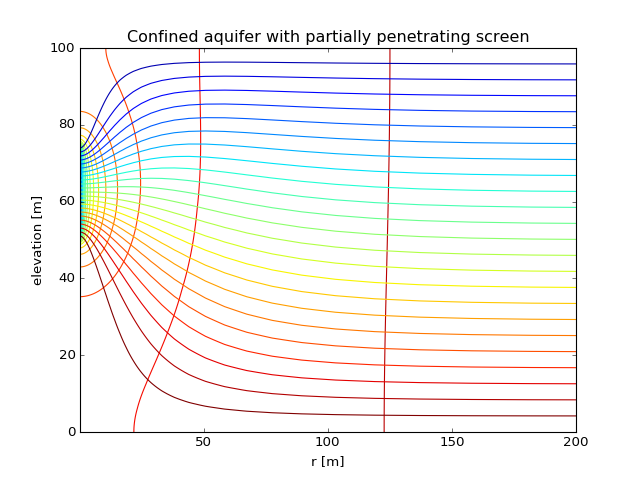

In [10]:
plt.figure()
plt.title('Confined aquifer with partially penetrating screen')
plt.setp(plt.gca(), 'xlabel','r [m]', 'ylabel', 'elevation [m]', 'xlim', (gr.x[0], 200.))
plt.contour(gr.xc, gr.zc, Out.Phi[0].T, 25)
plt.contour(gr.xp, gr.zp, Psi, 25)

Below the same numerically computed contours are shown together with the analytically computed ones.
As can be seen the difference is very small and can be attributed to small differences between the two methods, especially around the edges of the screen. The boundary conditions are the same,namely a fixed extraction per unit of screen length.

Partial penetration computed in 201 iteration


<IPython.core.display.Javascript object>


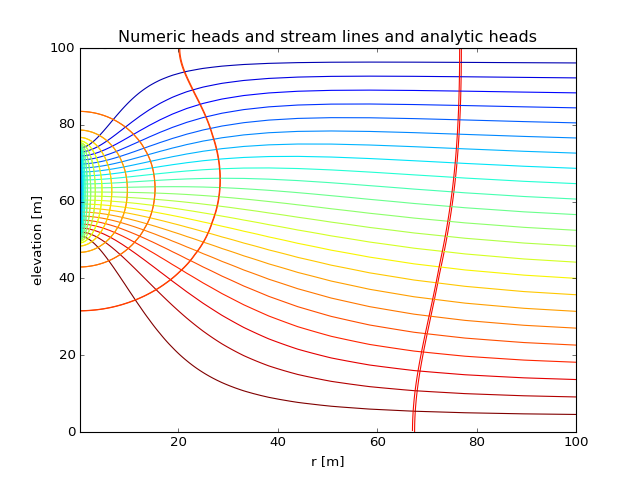

In [12]:
# Compute the drawdown analytically as the superposition of
# that of a fully penetrating well and the extra drawdown due to
# partial penetration.

dpp = pp(gr, a, b, D, tol=1e-2)

s = Q/(2 * np.pi * kD) * (np.log(R/ gr.XM) + dpp)
#s =  dpp

# suitable set of levels for head contouring of this case
cont = np.arange(0,-5,-0.25)[::-1]

plt.figure()
plt.title('Numeric heads and stream lines and analytic heads');
plt.setp(plt.gca(), 'xlabel','r [m]', 'ylabel', 'elevation [m]', 'xlim', (gr.x[0], 100.), 'ylim',(0, D))

plt.contour(gr.xc, gr.zc, Out.Phi[0].T, cont) # plot the numeric contours
plt.contour(gr.xp, gr.zp, Psi, 25) # plot the stream lines
plt.contour(gr.xm, gr.zm, s[0].T, cont) # plot the analytic contours

## Conclusion

We have implemented the stream function and used it to obtain the stream lines as its contours. This works both for flat models and for axially symmetric ones. Together with the head contours, the stream lines give a complete picture of the flow.

As can be seen, the stream function jumps at and above the wells. The branchcut at this jump runs from the wells vertically to the top of the model and, therefore, the look like wells. The number of vertial stream lines in the branchcut is exactly equal to their extraction. The flow can be computed by counting stream lines, as between each pair of stream lines the total discharge is the same. The specific dischage at any point can be computed by dividing the discharge between two stream lines by the distance between them.

The second example compares the heads or rather the drawdowns in a confined aquifer with a partially penetrating well screen. It shows that the analytical and numerical dawdowns are virtually the same, as the respective lines almost exactly lie upon onanother.

The next chapter will deal with transient flow. Particle tracking is delayed to later.